In [623]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from IPython.display import display
import seaborn as sns
%matplotlib inline
#pd.options.display.float_format = '{.3}'.format

import warnings
warnings.filterwarnings(action='ignore',module='scipy',message='^internal gelsd')

In [624]:
crime = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv',header=None)
crime.columns = ['city','population','violent_crime','murder_manslaughter','rape1','rape2','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']


In [625]:
# data cleaning

crime.drop(crime.index[[0,1,2,3,4,353,354,355]],inplace=True)
crime = crime.drop(['rape1'],axis=1)
crime = crime.reset_index(drop=True)
crime.head()

,city,population,violent_crime,murder_manslaughter,rape2,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [626]:
crime['arson'] = crime['arson'].fillna(0)

crime['population'] = crime['population'].apply(lambda x: str(x).replace(',',''))

crime['motor_theft'] = crime['motor_theft'].apply(lambda x: str(x).replace(',',''))
crime['robbery'] = crime['robbery'].apply(lambda x: str(x).replace(',',''))
crime['burglary'] = crime['burglary'].apply(lambda x: str(x).replace(',',''))
crime['property_crime'] = crime['property_crime'].apply(lambda x: str(x).replace(',',''))
crime['larceny'] = crime['larceny'].apply(lambda x: str(x).replace(',',''))
crime['violent_crime'] = crime['violent_crime'].apply(lambda x: str(x).replace(',',''))

crime['robbery1'] = crime['robbery'].apply(lambda x: (int(x) ** (1/4)))
crime['population1'] = crime['population'].apply(lambda x: (int(x) ** (1/3)))
crime = crime[crime['city'] != 'New York']

In [627]:
crime[['property_crime','population1','motor_theft','robbery1']]=crime[['property_crime','population1','motor_theft','robbery1']].apply(pd.to_numeric)



In [628]:
x = crime[['population1','motor_theft','robbery1']]
y = crime[['property_crime']].values.reshape(-1,1)
          
regr = linear_model.LinearRegression()

regr.fit(x,y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared:',regr.score(x, y))

Coefficients: 
 [[19.51205195 12.30862728 82.31576463]]
Intercept: 
 [-289.93815662]
R-squared: 0.9385756201367176


In [629]:
#predicting y values
y_pred = regr.predict(x).ravel()

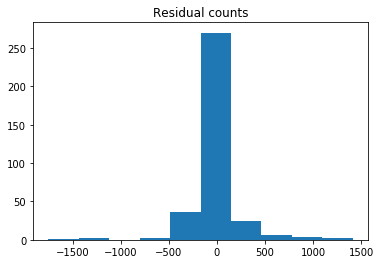

In [630]:
##multivariate normality
actual = crime['property_crime']

residual = actual.astype(float) - y_pred.astype(float)

plt.hist(residual,bins=10)
plt.title('Residual counts')
plt.show()

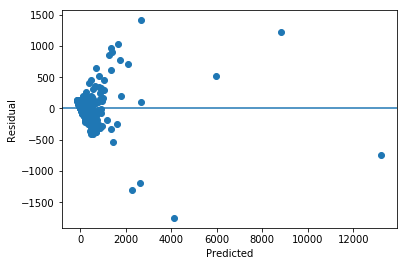

In [631]:
# homoscedasticity

plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.show()

In [632]:
correlation_matrix = x.corr()
display(correlation_matrix)

,population1,motor_theft,robbery1
population1,1.000000,0.560641,0.818622
motor_theft,0.560641,1.000000,0.588737
robbery1,0.818622,0.588737,1.000000


In [633]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='property_crime ~ population1 + motor_theft + robbery1', data=crime).fit()

lm.pvalues

Intercept       1.601142e-10
population1     2.703898e-12
motor_theft    4.109257e-154
robbery1        9.660132e-04
dtype: float64

In [634]:
lm.params

Intercept     -289.938157
population1     19.512052
motor_theft     12.308627
robbery1        82.315765
dtype: float64

In [635]:
lm.rsquared

0.9385756201367176

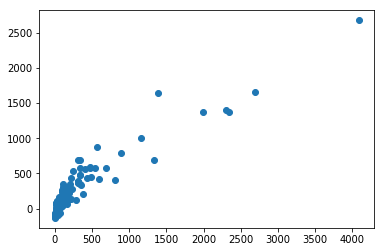

0.8284560750233618
Cross-validated scores: [0.81114345 0.96446477 0.59884188 0.75466478 0.39687084 0.25532233
 0.83358244 0.96292351 0.98158754 0.70735464]


In [650]:
#Cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.show()
print(model.score(X_test, y_test))

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model,x, y, cv=10)
print ('Cross-validated scores:', scores)


In [637]:
crimePA = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit2/table-8-pennsylvania.csv')
crimePA.columns = ['city','population','violent_crime','murder_manslaughter','rape1','rape2','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson','test']
crimePA.drop('test',axis=1,inplace=True)
crimePA.drop('rape2',axis=1,inplace=True)
crimePA.drop(crimePA.index[[853,854,855,856]],inplace=True)
crimePA.tail()

,city,population,violent_crime,murder_manslaughter,rape1,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson
848,York,"43,841",348,12.0,33,174,129,"1,481",486,905,90,21.0
849,York Area Regional,"60,995",136,0.0,8,19,109,711,135,552,24,5.0
850,Youngsville,"1,686",15,0.0,0,0,15,12,4,8,0,0.0
851,Zelienople,"3,771",4,0.0,0,0,4,56,2,51,3,0.0
852,Zerbe Township,"1,858",0,0.0,0,0,0,17,3,14,0,0.0


In [638]:
crimePA = crimePA[crimePA['city'] != 'Philadelphia']
crimePA['arson'] = crimePA['arson'].fillna(0)
crimePA['population'] = crimePA['population'].apply(lambda x: str(x).replace(',',''))
crimePA['motor_theft'] = crimePA['motor_theft'].apply(lambda x: str(x).replace(',',''))
crimePA['robbery'] = crimePA['robbery'].apply(lambda x: str(x).replace(',',''))
crimePA['property_crime'] = crimePA['property_crime'].apply(lambda x: str(x).replace(',',''))

crimePA['robbery1'] = crimePA['robbery'].apply(lambda x: (int(x) ** (1/4)))
crimePA['population1'] = crimePA['population'].apply(lambda x: (int(x) ** (1/3)))
crimePA[['population','property_crime','population1','motor_theft','robbery1']]=crimePA[['population','property_crime','population1','motor_theft','robbery1']].apply(pd.to_numeric)

x1 = crimePA[['population1','motor_theft','robbery1']]
y1 = crimePA[['property_crime']].values.reshape(-1,1)
          

In [639]:
#predicting y values
y_predPA = lm.predict(x1).ravel()

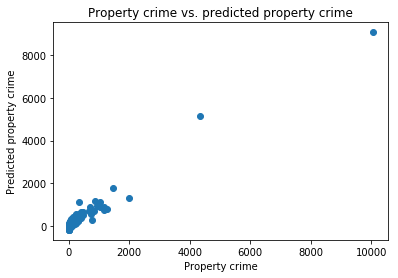

0.9503514081818527
Cross-validated scores: [0.92367929 0.47144814 0.79608033 0.75008416 0.83072826 0.76958989
 0.92232531 0.70348205 0.76863047 0.82424846]


In [646]:
#Cross validation
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)


predictions1 = lm.predict(X_test1)

plt.scatter(y_test1, predictions1)
plt.xlabel('Property crime')
plt.ylabel('Predicted property crime')
plt.title('Property crime vs. predicted property crime')
plt.show()
print(model.score(X_test1, y_test1))

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model,x1, y1, cv=10)
print ('Cross-validated scores:', scores)


Solely looking at accuracy, the new set of data is more accuate but not by a lot.  It is evident from the variation in cross validation scores, that the initial data set is overfitting more than the new data set.  For feature engineering, I figured population would obviously play a roll in the property crime predicition.  I played around with the other attribute to find three variables that satisfied the assumptions as best as possible. For example, I may have squared or taken the log of values to see what impact it had on the R squared value.  I stayed away from features that combined to give an extremely high R value because this is a sign of my model overfitting.  